In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
#pop = pd.read_csv('SYB63_1_202105_Population, Surface Area and Density.csv')
gdp = pd.read_csv('SYB63_230_202009_GDP and GDP Per Capita.csv')
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')

In [3]:
def split_df(df,df_name):
    key = Counter(df['Unnamed: 3']).keys()
    key = list(key)
    key = key[1:]
    print('변수 생성 개수',len(key))
    print(key)
    for i,v in enumerate(key):
        globals()['%s%d'%(df_name,i)] = df[df['Unnamed: 3']== v]
    
    return key
        
        
gdp_ = 'gdp_'
co2_ = 'co2_'
gdp_key = split_df(gdp,gdp_)
co2_key = split_df(co2,co2_)
    

변수 생성 개수 4
['GDP in current prices (millions of US dollars)', 'GDP per capita (US dollars)', 'GDP in constant 2010 prices (millions of US dollars)', 'GDP real rates of growth (percent)']
변수 생성 개수 2
['Emissions (thousand metric tons of carbon dioxide)', 'Emissions per capita (metric tons of carbon dioxide)']


In [4]:
len(gdp_0),len(gdp_1),len(gdp_2),len(gdp_3),len(co2_0),len(co2_1)

(1662, 1662, 1662, 1658, 1066, 1066)

In [5]:
def graph(a,b,c,d,ss):
    s = a.columns[2]
    x1 = a['%s'%s]
    y1 = a['Unnamed: 4'].astype(float)
    x2 = b['%s'%s]
    y2 = b['Unnamed: 4'].astype(float)
    x3 = c['%s'%s]
    y3 = c['Unnamed: 4'].astype(float)
    x4 = d['%s'%s]
    y4 = d['Unnamed: 4'].astype(float)
  
    plt.figure(figsize=(30,25))
    plt.subplots_adjust(hspace=1)
    plt.suptitle('%s'%ss,fontsize=40)
    ##
    plt.subplot(5,1,1)
    line1 = plt.plot(x1,y1,label='2005')
    plt.setp(line1, color='r', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%a['Unnamed: 2'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,2)
    line2 = plt.plot(x2,y2,label='2010')
    plt.setp(line2, color='g', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%b['Unnamed: 2'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,3)
    line3 = plt.plot(x3,y3,label='2015')
    plt.setp(line3, color='b', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%c['Unnamed: 2'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,4)
    line4 = plt.plot(x4,y4,label='2017')
    plt.setp(line4, color='y', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%d['Unnamed: 2'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,5)
    plt.plot(x1,y1,'r',label='2005')
    plt.plot(x2,y2,'g',label='2010')
    plt.plot(x3,y3,'b',label='2015')
    plt.plot(x4,y4,'y',label='2017')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Total',fontsize=25)
    plt.legend(fontsize=20)
    plt.show()

### 05,10,15,17 년도 별로 데이터 분류

In [6]:
def data(dataframe):
    dataframe.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
    a = dataframe.loc[dataframe['Unnamed: 2']=='2005']
    b = dataframe.loc[dataframe['Unnamed: 2']=='2010']
    c = dataframe.loc[dataframe['Unnamed: 2']=='2015']
    d = dataframe.loc[dataframe['Unnamed: 2']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

### 각 데이터프레임마다 나라의 개수가 달라서, 나라 개수 맞추는 함수 country()

In [7]:
def country(df1,df2): 
    country = []
    for i  in df1['%s'%df1.columns[1]]:
        for j in df2['%s'%df2.columns[1]]:
            if i==j:
                country.append(i)
    #country = {'country':country}
    #country = pd.DataFrame(country)
    return country  

In [8]:
a0,b0,c0,d0,gdp_0 = data(gdp_0) 
a1,b1,c1,d1,gdp_1 = data(gdp_1)
a2,b2,c2,d2,gdp_2 = data(gdp_2)
a3,b3,c3,d3,gdp_3 = data(gdp_3)
a00,b00,c00,d00,co2_0 = data(co2_0)
a11,b11,c11,d11,co2_1 = data(co2_1)

In [9]:
GDP = [a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
CO2 = [a00,b00,c00,d00,a11,b11,c11,d11]

### Standardization 표준화 함수

In [10]:
def normalization(df):
    df['Unnamed: 4'] = (df['Unnamed: 4'] - df['Unnamed: 4'].mean())/df['Unnamed: 4'].std()
    return df['Unnamed: 4']

In [11]:
for i in GDP:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)
for i in CO2:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)

### FOR 문을 통해서 각 데이터별 비교하여 동일한 나라 개수 확인

In [12]:
country_len = []
countries = []
idx = []
for i,v in enumerate(GDP):
    for j,k in enumerate(CO2):
        countries_ = country(v,k) #변수에 비교값 나라명 데이터 저장
        countries.append(country(v,k)) #배열에 나라명 데이터 저장 
        country_len.append(len(countries_)) #각 길이데이터를 저장
#country_len

### 제일 작은 동일나라 개수를 갖는 조합 그리고, 둘 이상이라면 개수에 추가하여 내용이 같은지 판단

In [13]:
print(country_len,end=" ")

[138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 138, 138, 138, 138, 138, 138, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141] 

In [14]:
min_idx = []
for i in range(len(countries)):
    if min(country_len) == country_len[i]:
        min_idx.append(i)
print('최소 동일 개수',min(country_len))
print('최소 동일 개수를 같는 조합 인덱스 ',min_idx)

최소 동일 개수 138
최소 동일 개수를 같는 조합 인덱스  [0, 1, 4, 5, 32, 33, 36, 37, 64, 65, 68, 69, 96, 97, 98, 99, 100, 101, 102, 103]


### 138의 최소길이를 뽑은 배열들의 나라 이름의 동일함 판단

In [15]:
for i in range(len(min_idx)-1):
    if countries[min_idx[i]]==countries[min_idx[i+1]]:
        print(min_idx[i],min_idx[i+1],end=" , ")

0 1 , 1 4 , 4 5 , 5 32 , 32 33 , 33 36 , 36 37 , 37 64 , 64 65 , 65 68 , 68 69 , 69 96 , 96 97 , 97 98 , 98 99 , 99 100 , 100 101 , 101 102 , 102 103 , 

#### 처음 조합부터 끝까지 모두 동일함을 확인

### country변수의 나라를 기준으로 데이터 경량화 진행

In [16]:
print('해당 나라를 기준으로 데이터 경량화 진행')
country = countries[0]
country = {'country':country}
country = pd.DataFrame(country)
country

해당 나라를 기준으로 데이터 경량화 진행


,country
0,Albania
1,Algeria
2,Angola
3,Argentina
4,Armenia
...,...
133,Venezuela (Boliv. Rep. of)
134,Viet Nam
135,Yemen
136,Zambia


### 경량화 함수 size_()

In [17]:
def size_(sizing, df):  
    df_country = df.columns[1]
    size_col = sizing.columns[0]
    return pd.merge(sizing,df,left_on='%s'%size_col,right_on='%s'%df_country)

In [18]:
print('경량화 전',len(a0))

경량화 전 242


In [19]:
print('경량화 후',len(a0))

경량화 후 242


In [20]:
a0 = size_(country,a0)
b0 = size_(country,b0)
c0 = size_(country,c0)
d0 = size_(country,d0)
a1 = size_(country,a1)
b1 = size_(country,b1)
c1 = size_(country,c1)
d1 = size_(country,d1)
a2 = size_(country,a2)
b2 = size_(country,b2)
c2 = size_(country,c2)
d2 = size_(country,d2)
a3 = size_(country,a3)
b3 = size_(country,b3)
c3 = size_(country,c3)
d3 = size_(country,d3)

a00 = size_(country,a00)
b00 = size_(country,b00)
c00 = size_(country,c00)
d00 = size_(country,d00)
a11 = size_(country,a11)
b11 = size_(country,b11)
c11 = size_(country,c11)
d11 = size_(country,d11)

In [47]:
GDP = [a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
CO2 = [a00,b00,c00,d00,a11,b11,c11,d11]

### gdp 그래프

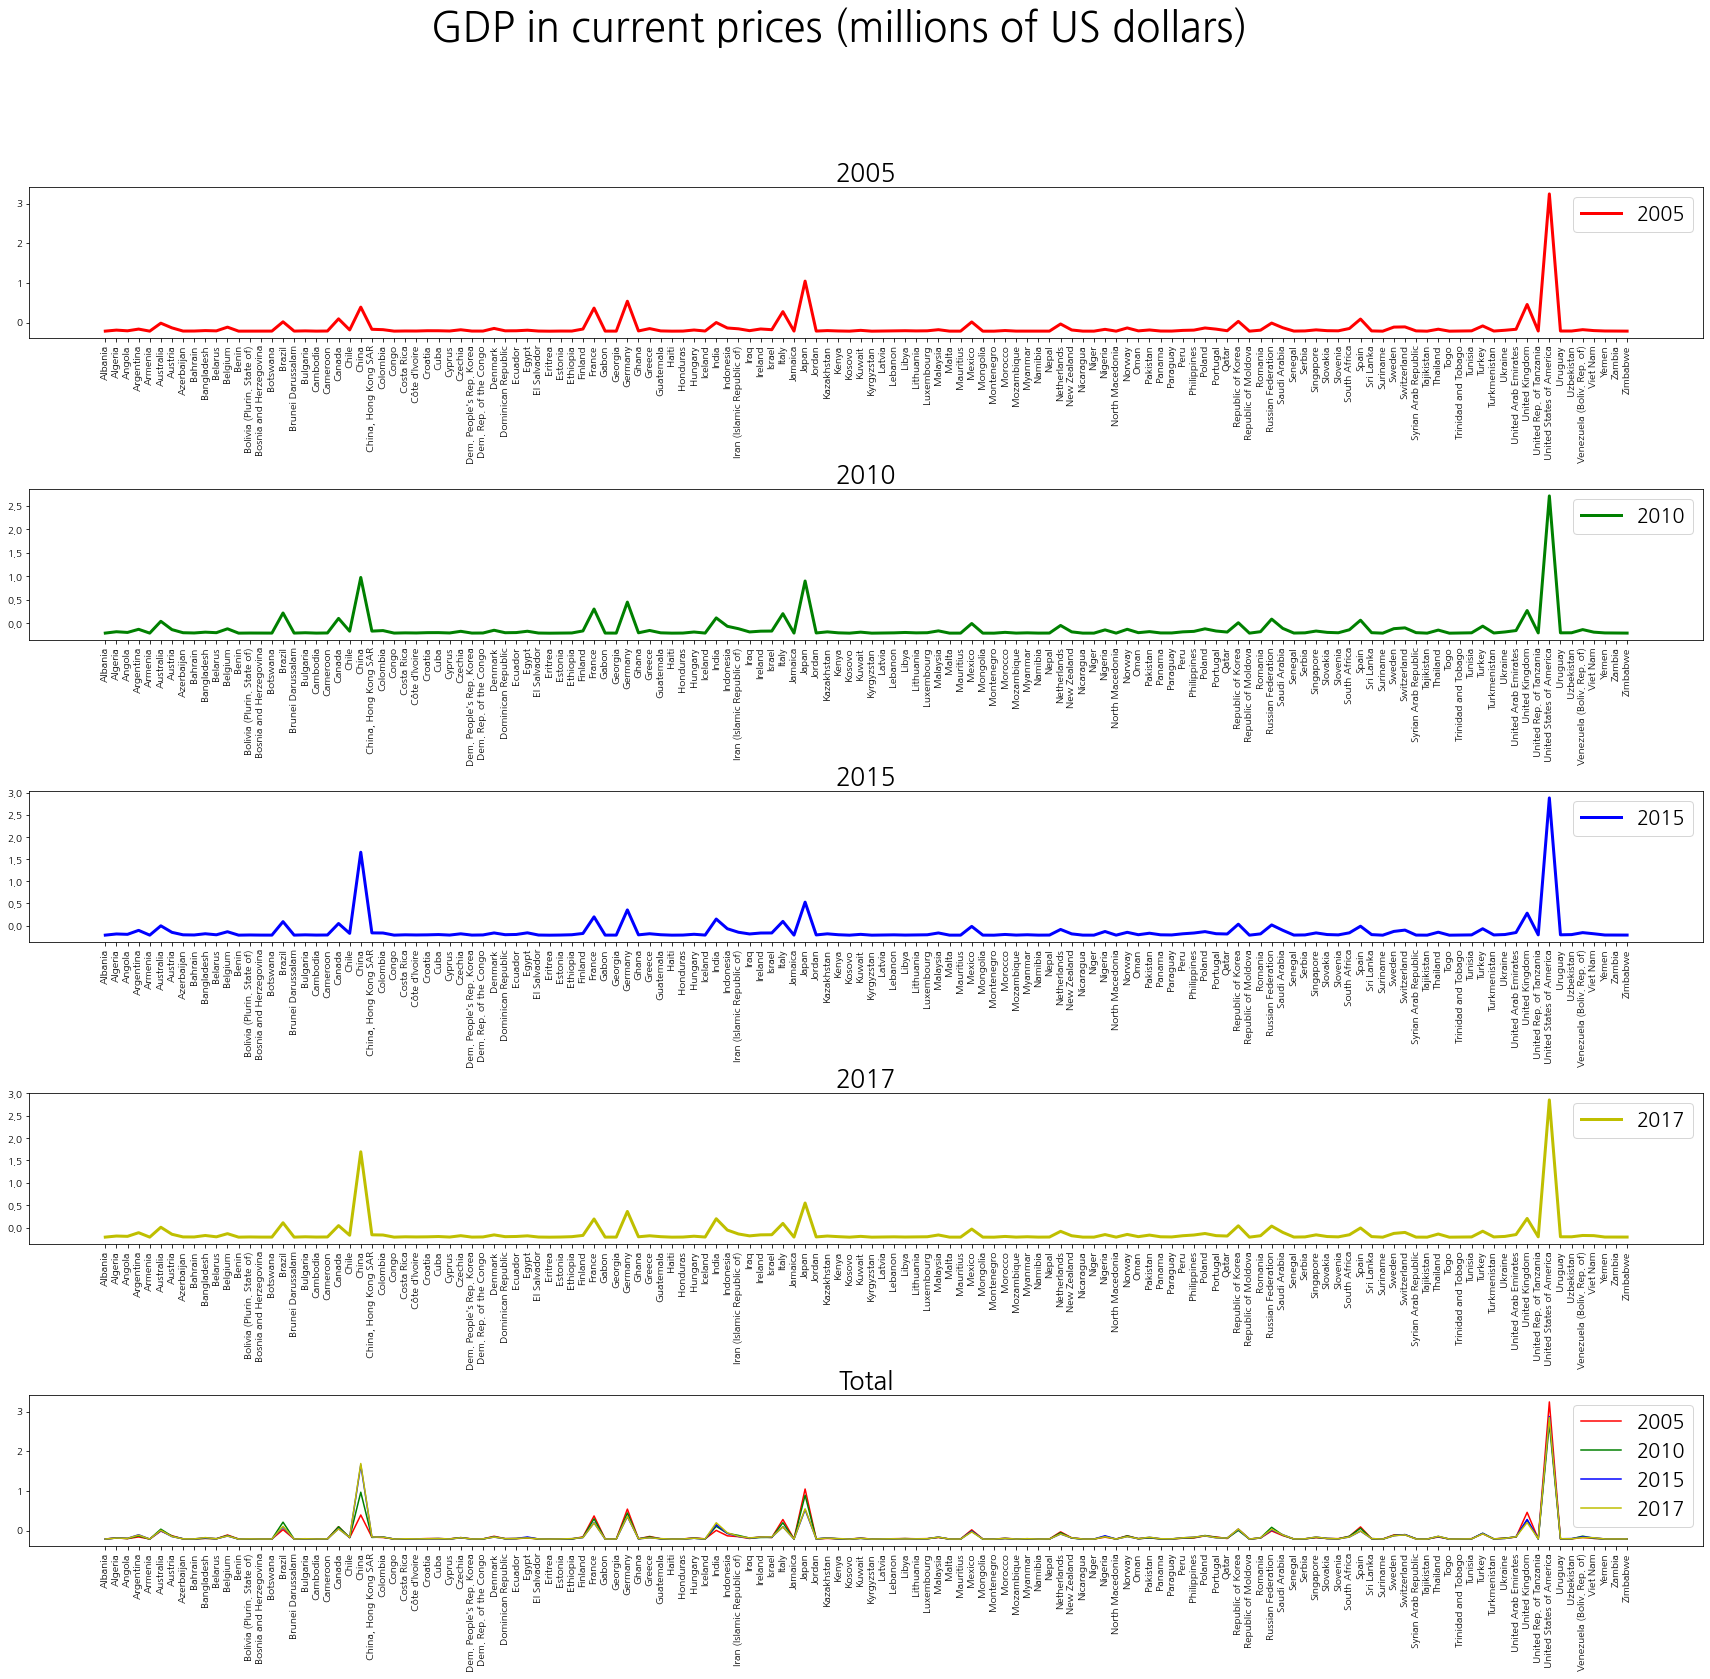

In [48]:
graph(a0,b0,c0,d0,gdp_key[0]) 

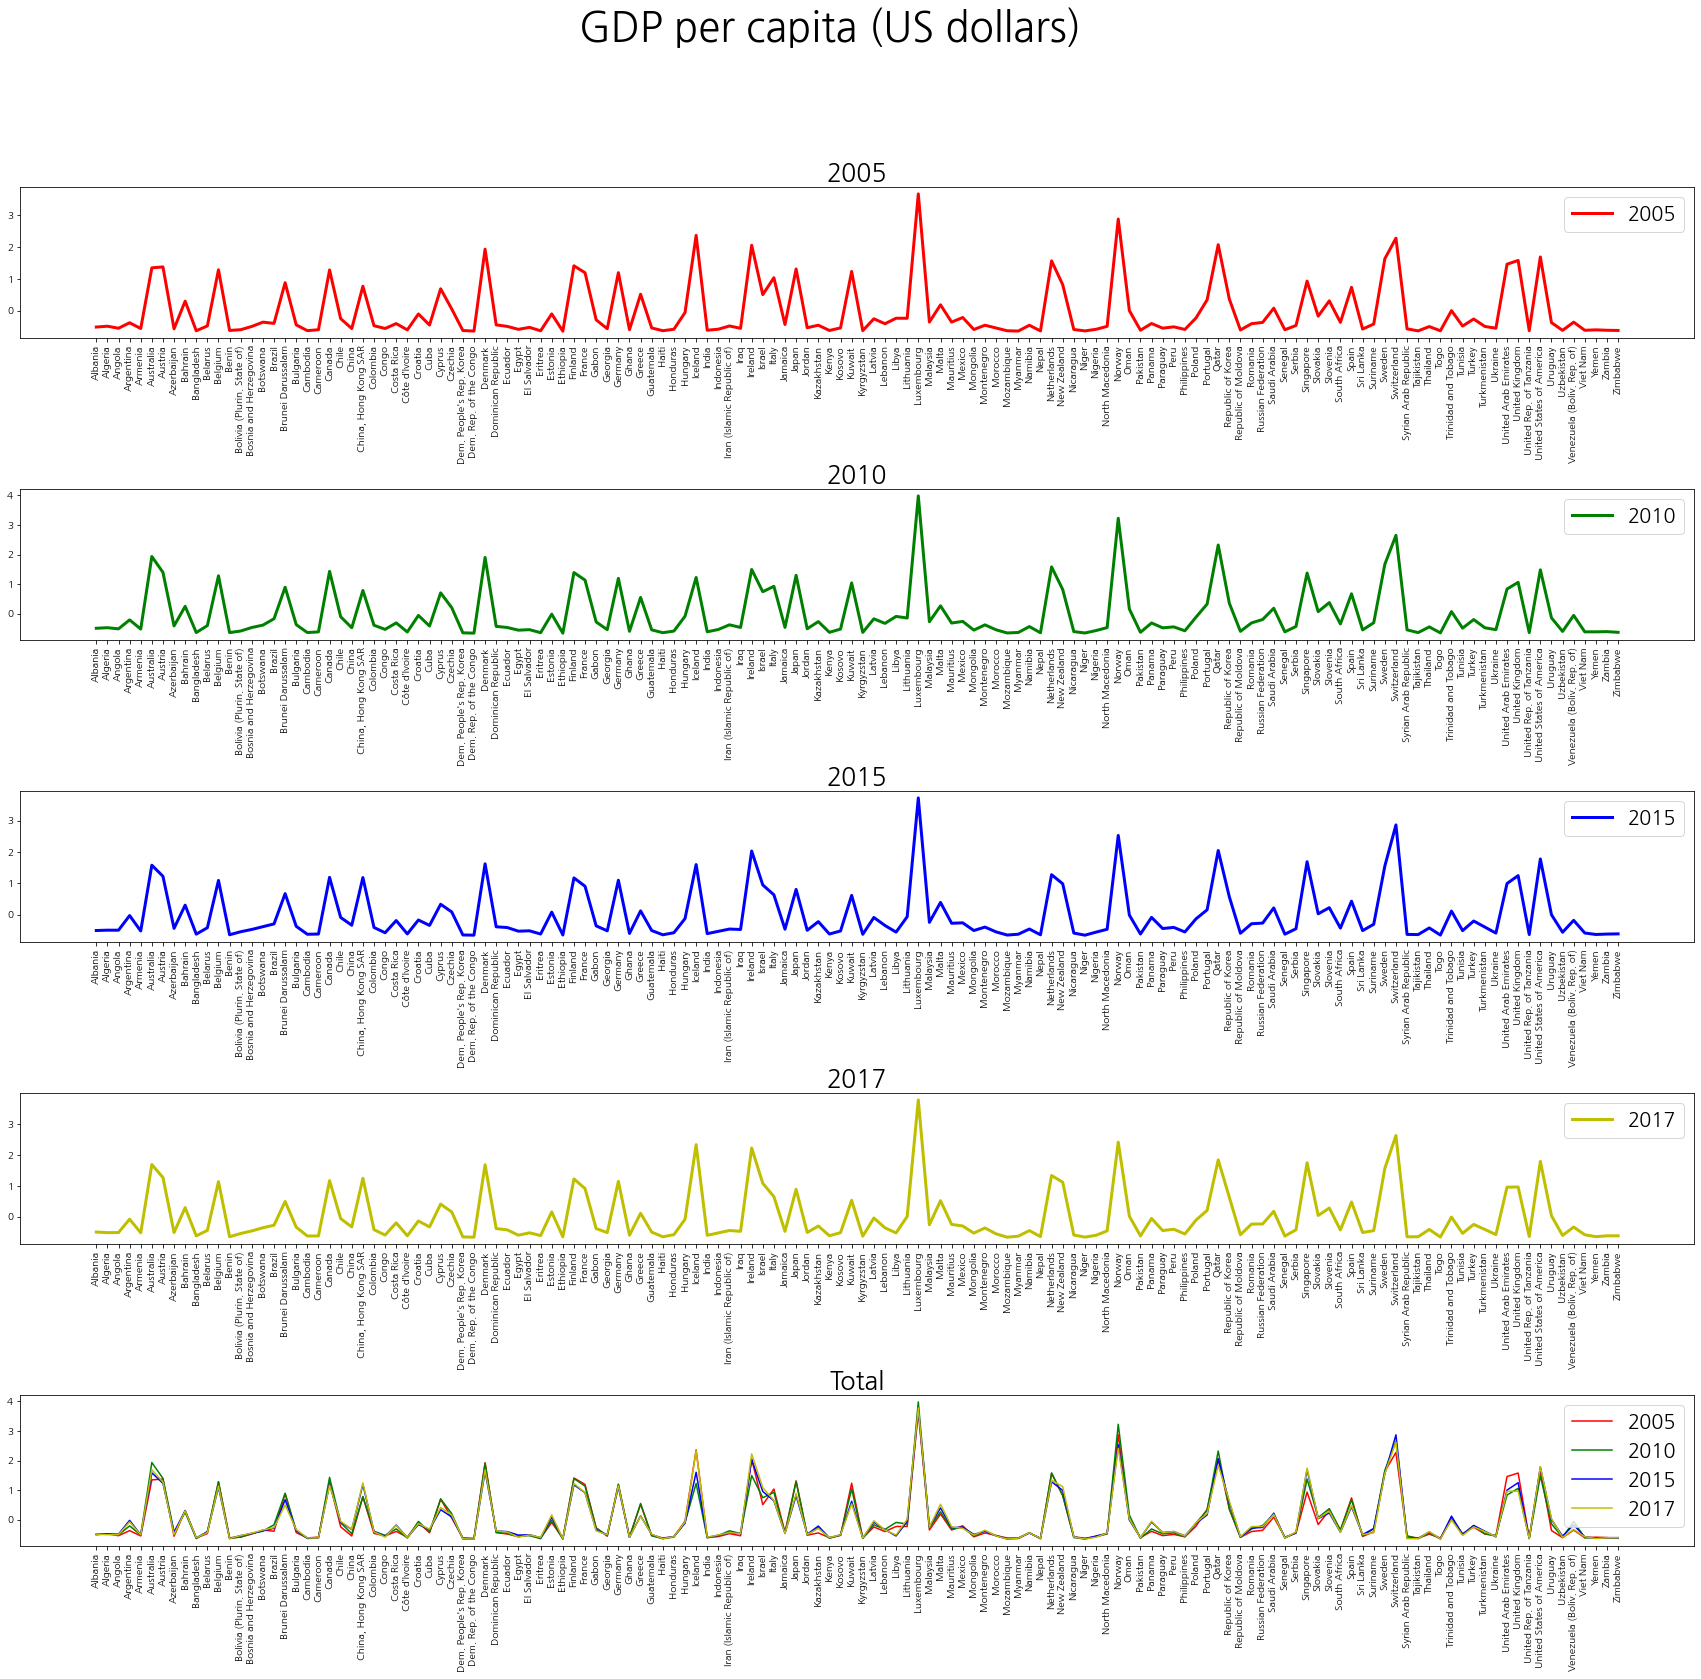

In [49]:
graph(a1,b1,c1,d1,gdp_key[1]) 

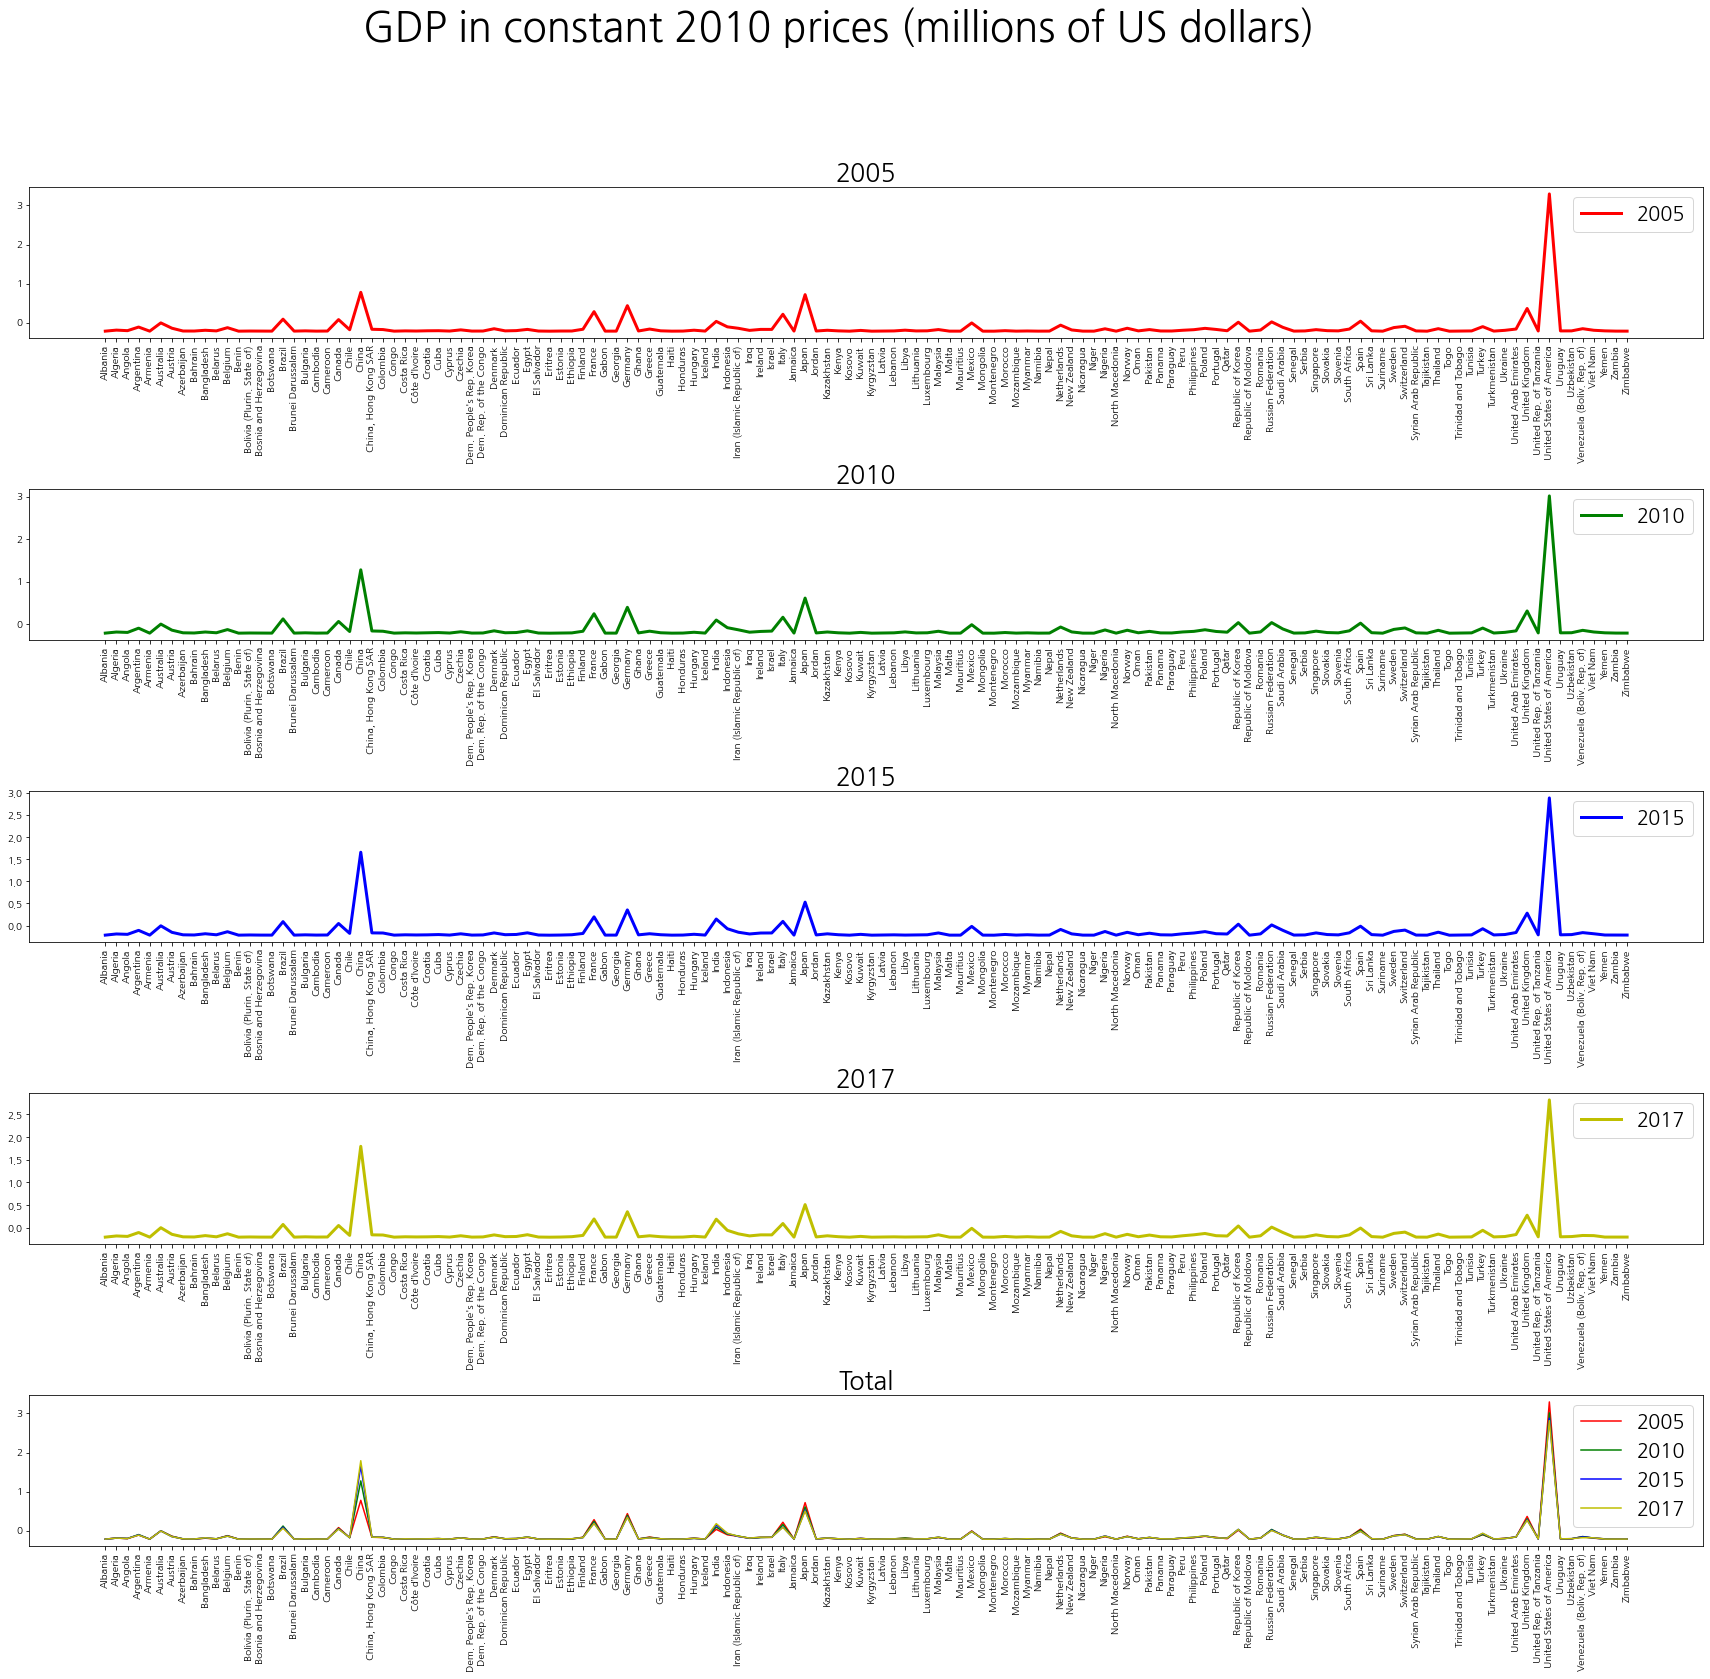

In [50]:
graph(a2,b2,c2,d2,gdp_key[2]) 

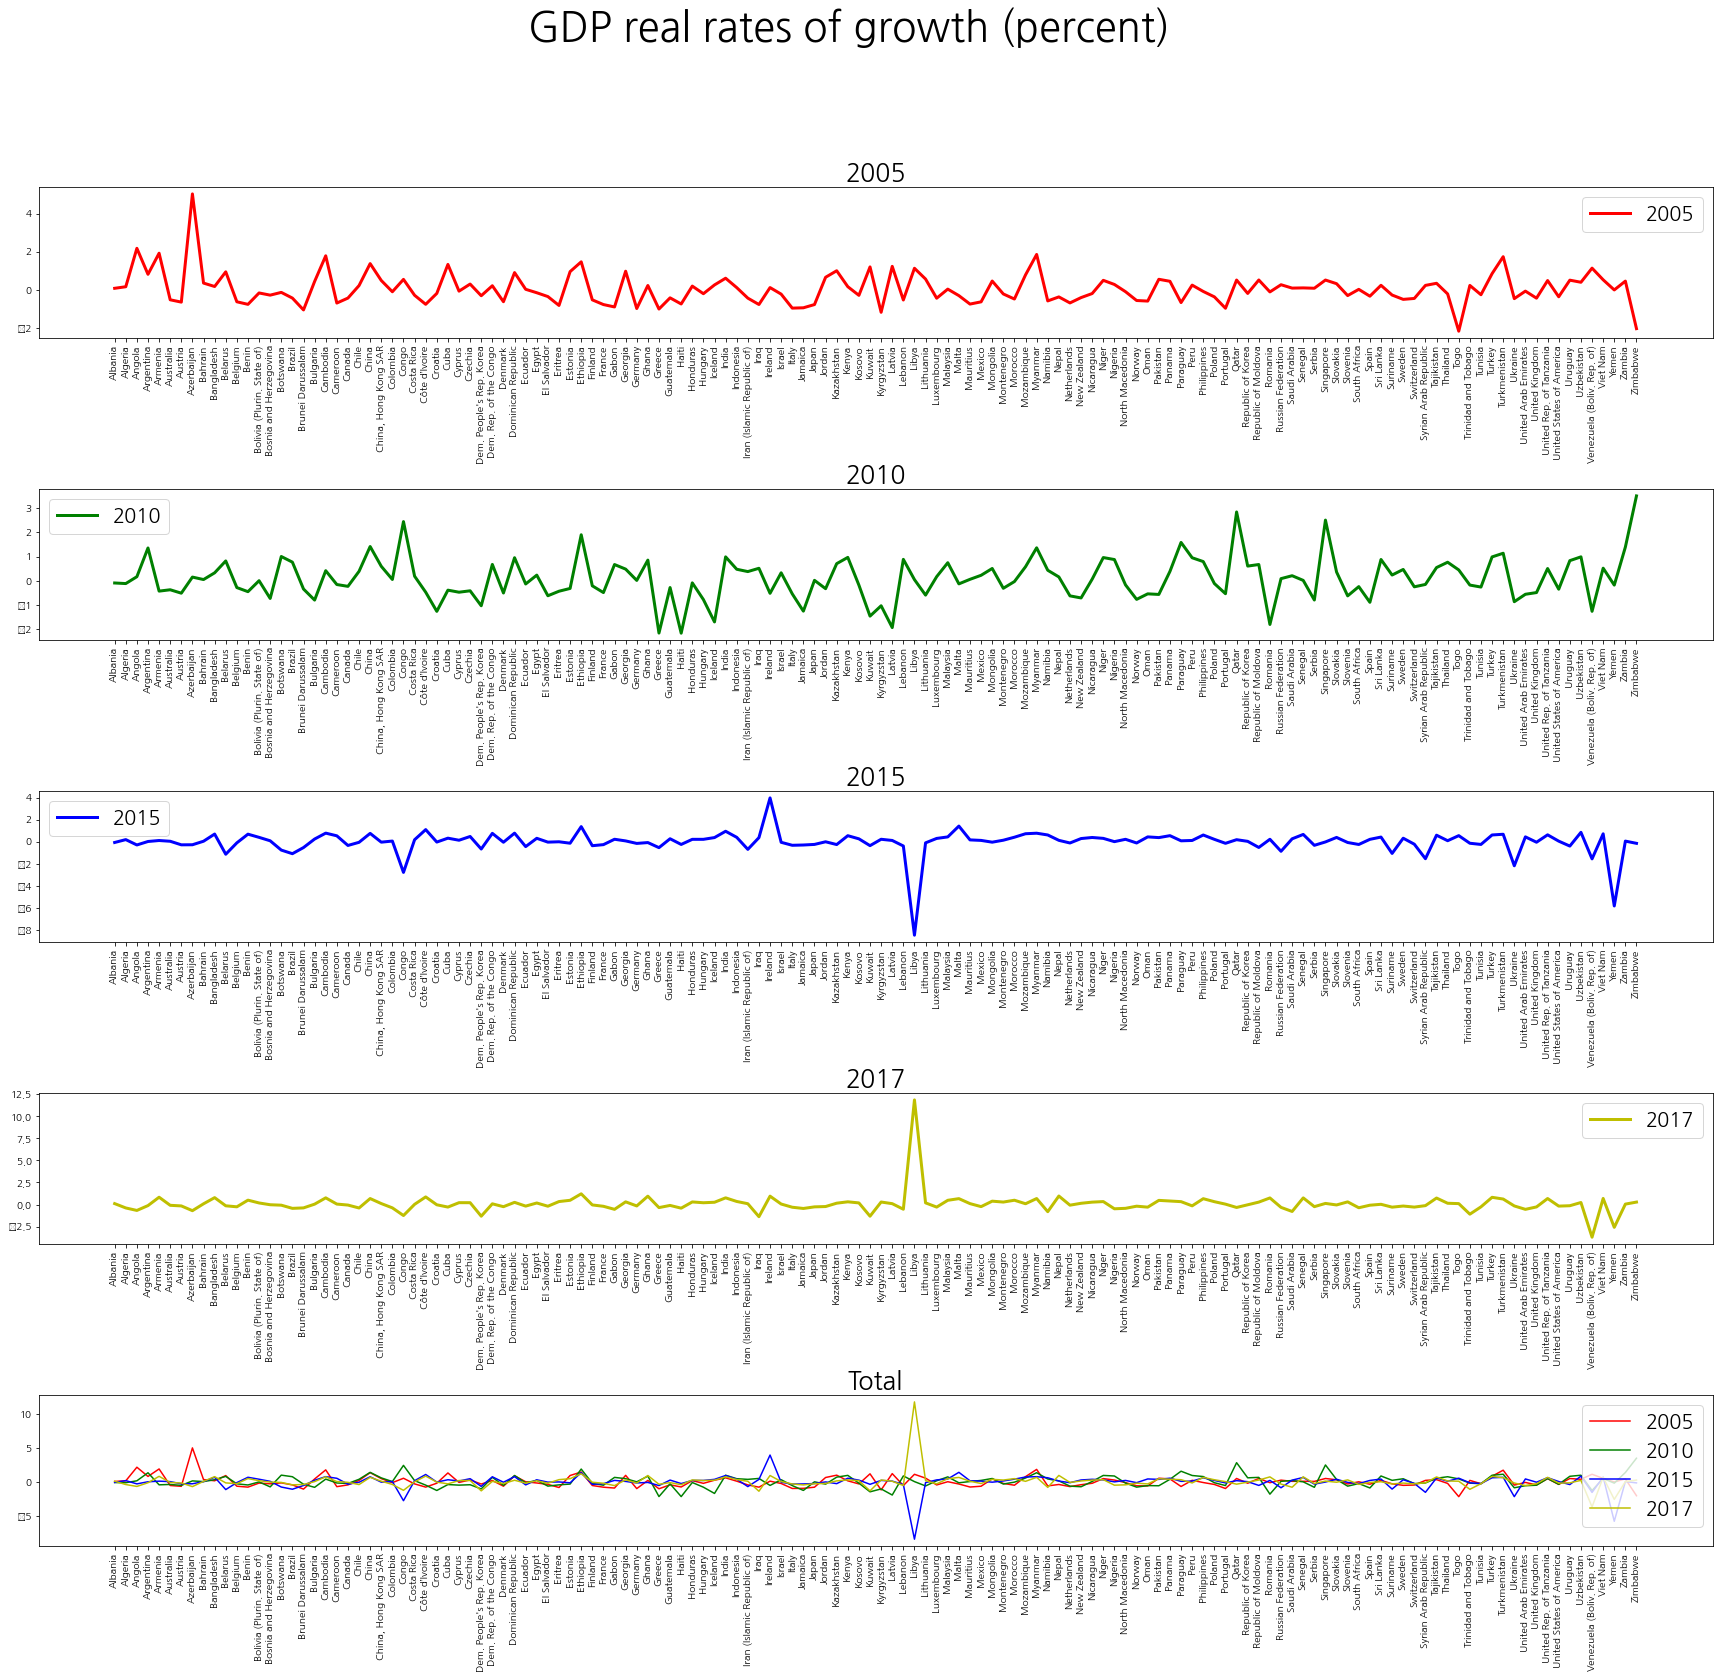

In [51]:
graph(a3,b3,c3,d3,gdp_key[3]) 

### Co2그래프

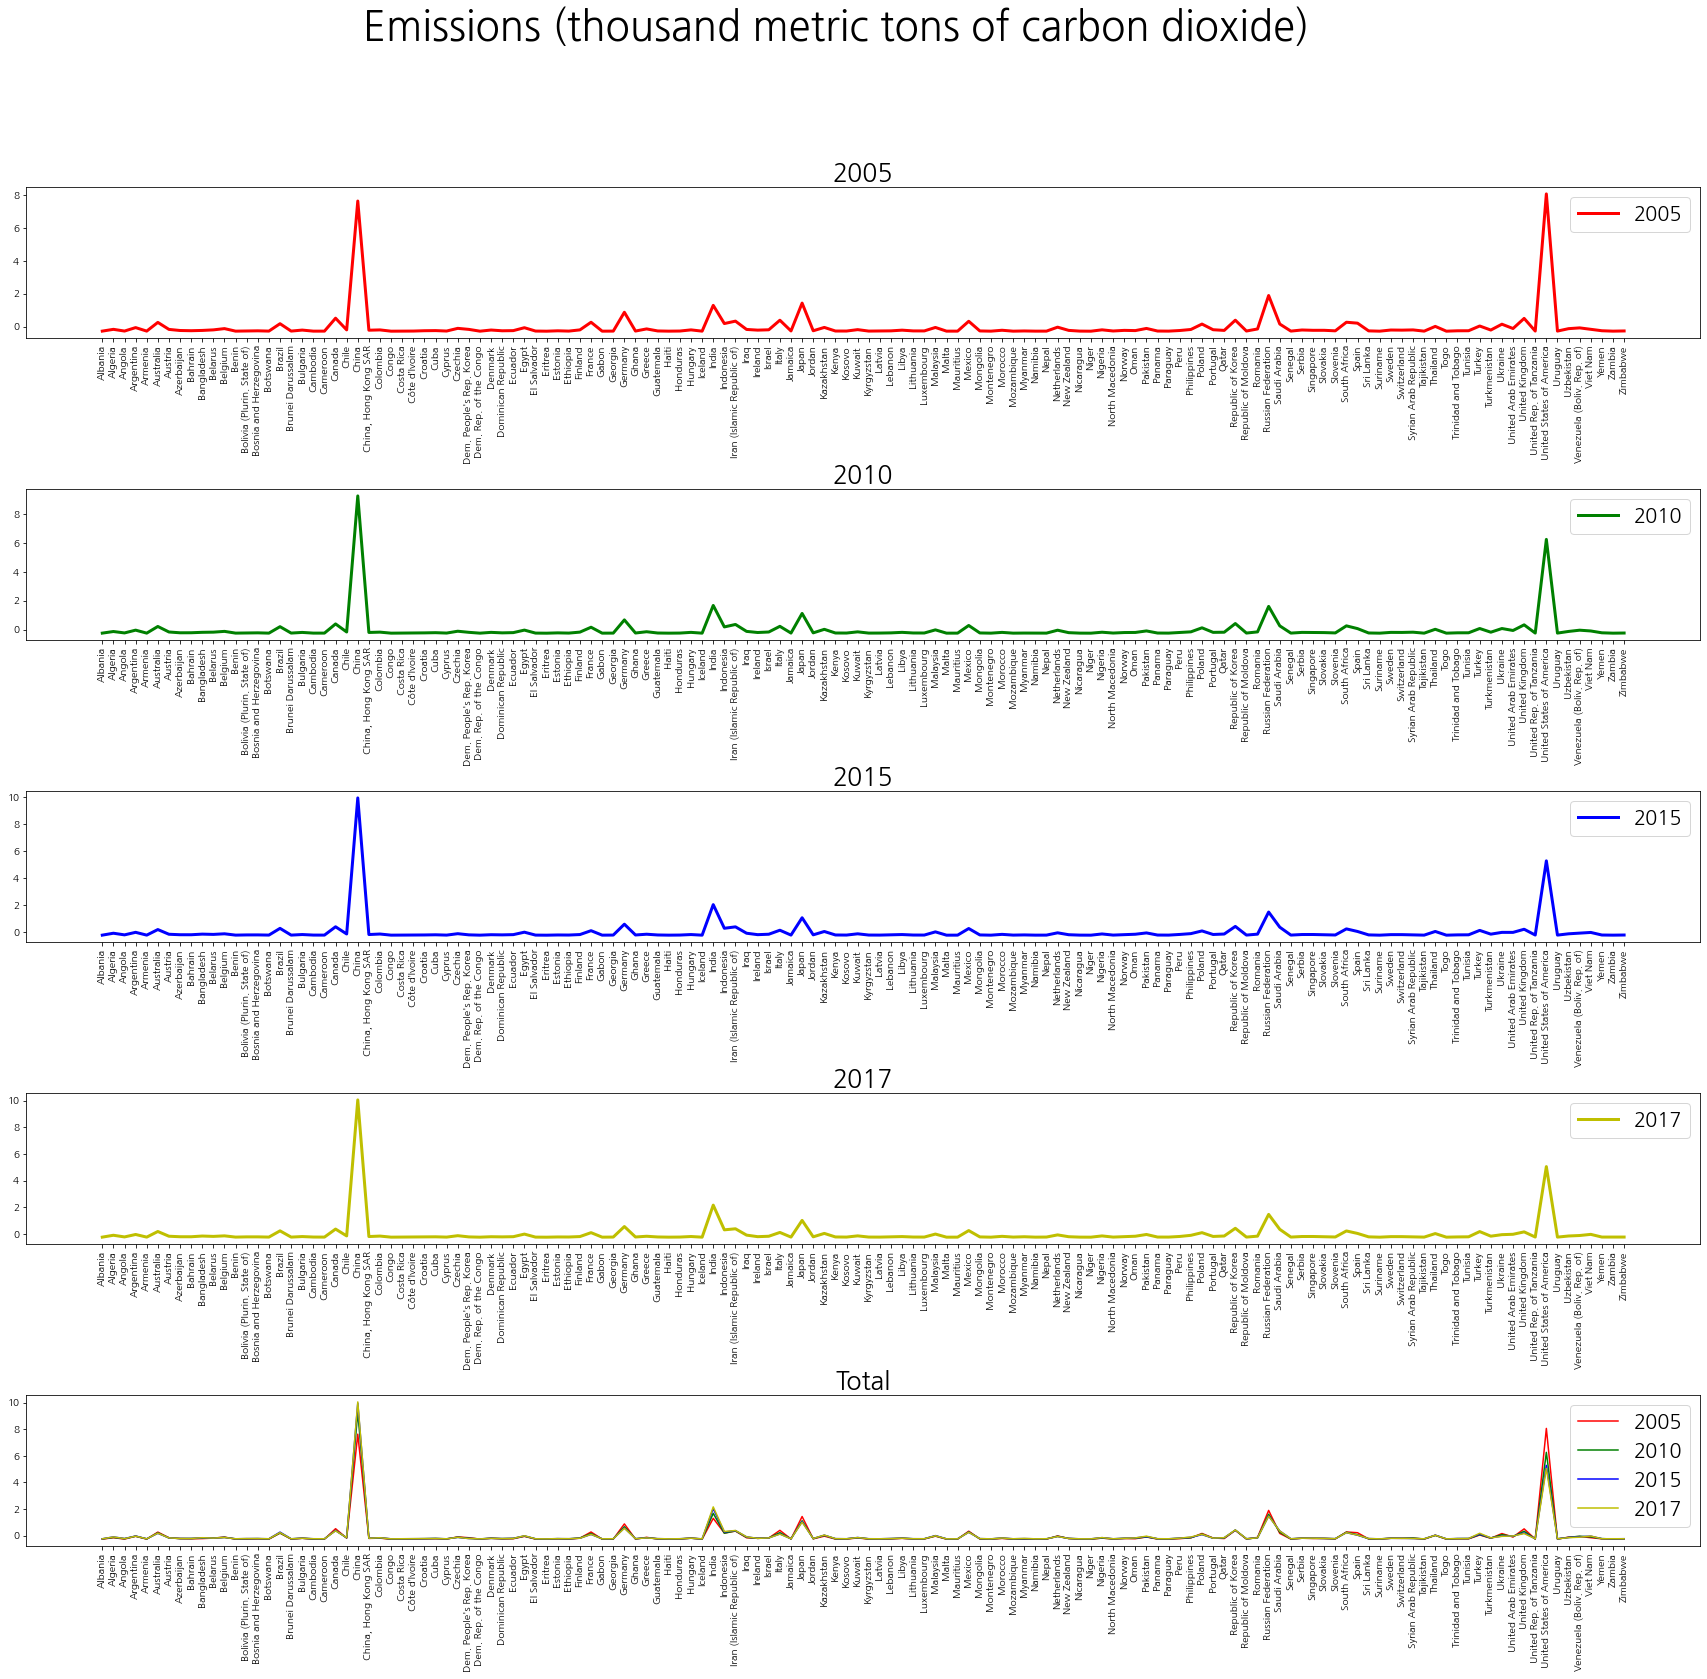

In [52]:
graph(a00,b00,c00,d00,co2_key[0]) 

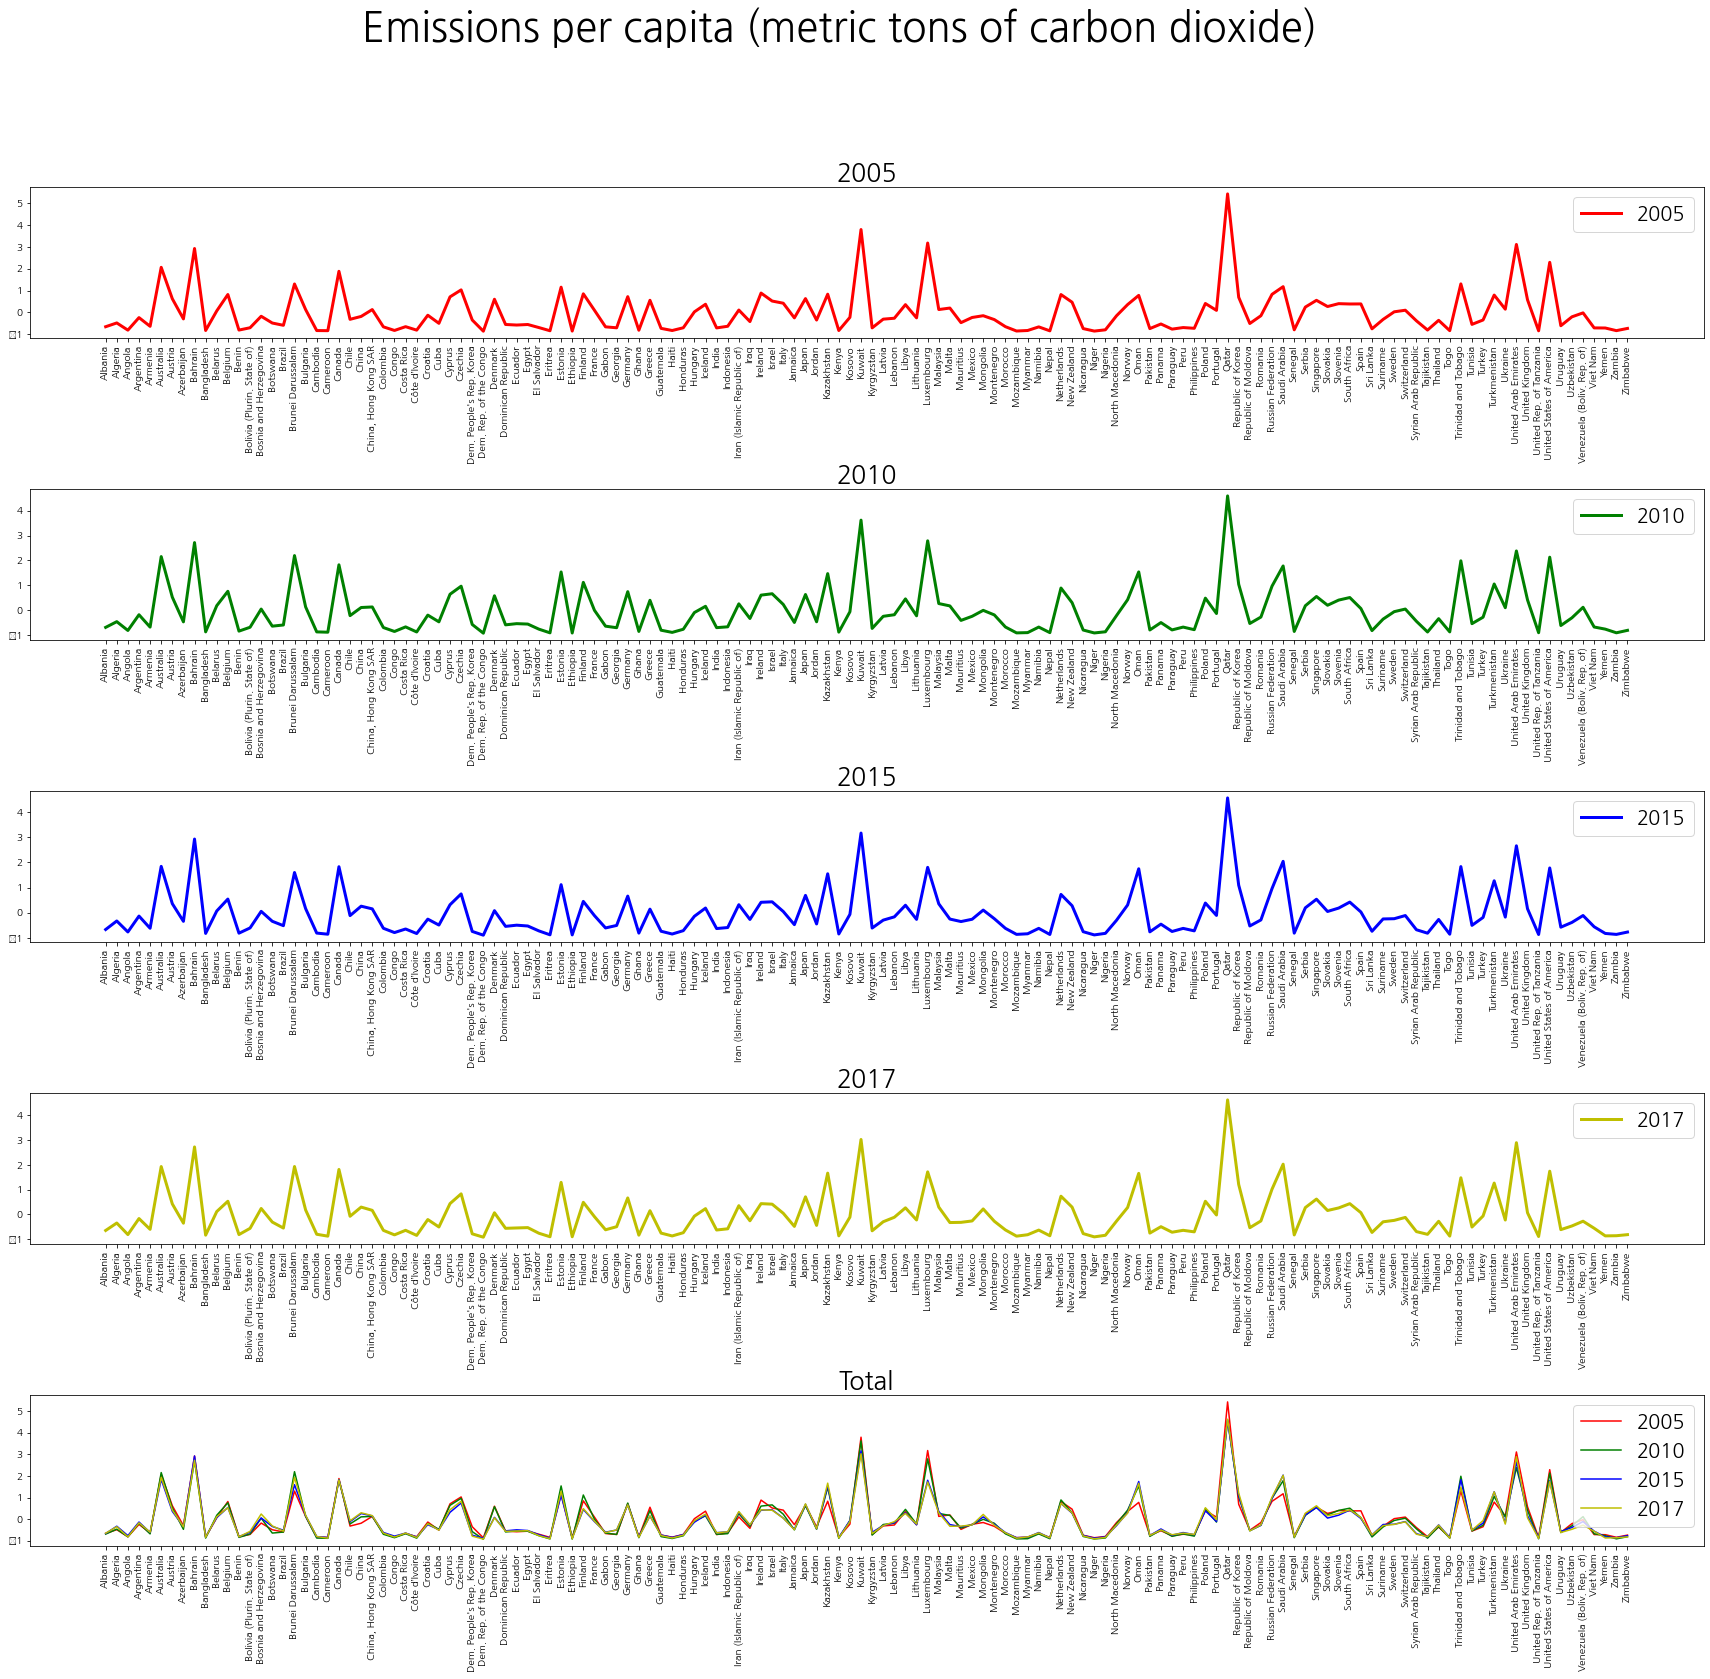

In [53]:
graph(a11,b11,c11,d11,co2_key[1]) 

------------------------------------------------

In [54]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [55]:
# for문을 통해 데이터프레임을 호출하고, 사이즈를 조정
# 그러나 데이터 프레임은 상호작용 불가, 해쉬 X 안됨 결론.
#for i in GDP:
#    i = size_(country,i)
#def size_(sizing, df):  
#    df_country = df.columns[1]
#    size_col = sizing.columns[0]
#    return pd.merge(sizing,df,left_on='%s'%size_col,right_on='%s'%df_country)#

In [56]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='%s'%i.columns[1],right_on='%s'%j.columns[1])
    result = result.drop('CO2 emission estimates',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

In [61]:
a0.head(1)

,country,T12,Gross domestic product and gross domestic product per capita,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Albania,8,Albania,2005,GDP in current prices (millions of US dollars),-0.210271,NaN,"United Nations Statistics Division, New York, ..."


In [62]:
sim_ = []
info_ = []
for i,v in enumerate(GDP):
    sim = []
    for j,k in enumerate(CO2):
        if i+j == 0:
            v=v.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
            k=k.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
            
        sim.append(similarity(v,k))
        sim_.append(similarity(v,k))
        info_.append([similarity(v,k),i,j])
        
        gdp_name = v['%s'%v.columns[4]].iloc[0]
        co2_name = k['%s'%k.columns[4]].iloc[0]
        gdp_year = v['%s'%v.columns[3]].iloc[0]
        co2_year = k['%s'%k.columns[3]].iloc[0]
        
        print( '%s --V.S-- %s'%(gdp_name,co2_name))
        print(gdp_year,co2_year)
        print(similarity(v,k),i,j)
        print()
    simil_mean = sum(sim)/len(sim)
    print('-'*130)
    print( '%s %s년 --V.S-- %s'%(gdp_name,gdp_year,co2_name))
    print('평균값==>>',simil_mean)
    print('-'*130,'\n')
simil_mean = sum(sim_)/len(sim_)
print(simil_mean, 'co2와 internet usage 유사도 총합 평균')

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2005
0.7488245529900913 0 0

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2010
0.623407806756159 0 1

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2015
0.5507128353719044 0 2

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2017
0.5345595346697368 0 3

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2005
0.24183415068468286 0 4

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2010
0.2333463077826825 0 5

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2015
0.2316325231951762 0 6

GDP in current

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2015 2005
0.15198711853756416 6 0

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2015 2010
0.10526670132235702 6 1

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2015 2015
0.07825230603286266 6 2

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2015 2017
0.07223854080842244 6 3

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2005
0.6866570363895347 6 4

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2010
0.6555464960936216 6 5

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2015
0.5941569019884955 6 6

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2017
0.5941914225792843 6 7

--------------------

0.20064545265703554 11 5

GDP in constant 2010 prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2017 2015
0.20922437451866996 11 6

GDP in constant 2010 prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2017 2017
0.2060314343535365 11 7

----------------------------------------------------------------------------------------------------------------------------------
GDP in constant 2010 prices (millions of US dollars) 2017년 --V.S-- Emissions per capita (metric tons of carbon dioxide)
평균값==>> 0.5190577761314531
---------------------------------------------------------------------------------------------------------------------------------- 

GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2005
0.02227624606362057 12 0

GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2010
0.06014002951512165 12 1

GDP 

In [63]:
print('최고 유사도->',max(sim_))
for i in range(len(sim_)): # 유사도가 제일 높은 데이터 조합 index찾기
    if max(sim_) == sim_[i]:
        print('최고 유사도 index',i)

sim_[88] == max(sim_)

최고 유사도-> 0.9008219116111975
최고 유사도 index 88


True

In [64]:
info_[88]

[0.9008219116111975, 11, 0]

In [65]:
first = info_[88][1]
second = info_[88][2]

In [ ]:
CO2[second]['%s'%CO2[second].columns[2]]

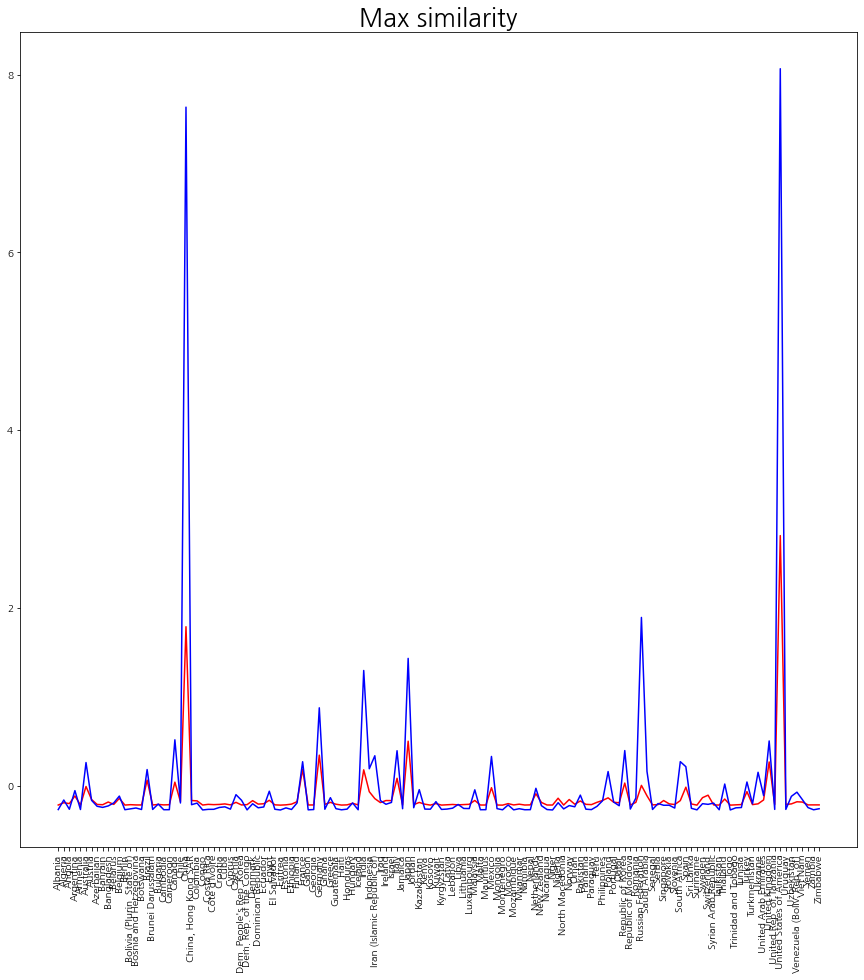

In [71]:
plt.figure(figsize=(15,15))
plt.plot(GDP[first]['%s'%GDP[first].columns[2]],GDP[first]['Unnamed: 4'],'r')
plt.plot(CO2[second]['%s'%CO2[second].columns[2]],CO2[second]['Unnamed: 4'],'b')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Max similarity',fontsize=25)
plt.show()
